In [52]:

# normal 
import numpy as np
import pandas as pd

# imports 
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# Geo-location stuffs
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geopy

# models 
from scipy.cluster.vq import vq, kmeans, whiten


# ploting 
import matplotlib.pyplot as plt
import seaborn as sns



scipy.__version__

'1.5.0'

---

In [28]:
scipy __version

SyntaxError: invalid syntax (<ipython-input-28-3e8a894842f3>, line 1)

In [5]:
df = pd.read_csv("./data/crashes_lincoln_tunnel.csv")
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [11]:
df.shape

(2555, 11)

In [6]:
df.head()

,Unnamed: 0,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry
0,80,2019-01-01,01/01/2019,4:50,MANHATTAN,10001.0,40.751026,-73.996620,"(40.751026, -73.99662)",Unspecified,POINT (-73.99662 40.75103)
1,87,2019-01-01,01/01/2019,4:23,NaN,NaN,40.761500,-73.997826,"(40.7615, -73.997826)",Driver Inattention/Distraction,POINT (-73.99783 40.76150)
2,174,2019-01-01,01/01/2019,2:30,MANHATTAN,10001.0,40.749706,-73.991570,"(40.749706, -73.99157)",Passing or Lane Usage Improper,POINT (-73.99157 40.74971)
3,200,2019-01-01,01/01/2019,19:45,NaN,NaN,40.758533,-73.988850,"(40.758533, -73.98885)",Turning Improperly,POINT (-73.98885 40.75853)
4,333,2019-01-01,01/01/2019,19:03,MANHATTAN,10018.0,40.754055,-73.995830,"(40.754055, -73.99583)",Other Vehicular,POINT (-73.99583 40.75406)


---

In [22]:
from scipy.cluster.vq import vq, kmeans, whiten

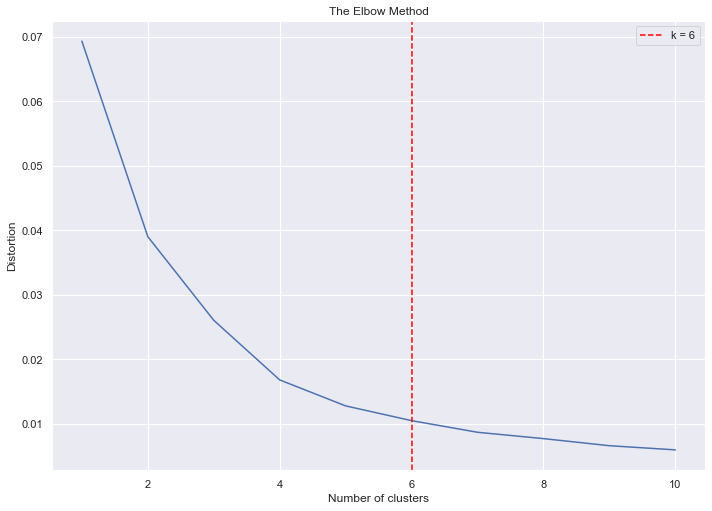

In [53]:
# hunts for best model
X = df[["LATITUDE","LONGITUDE"]]

max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [57]:
# Runs Kmeans clustering model 

# define X, y

X = df[["LATITUDE","LONGITUDE"]]
df_X = X.copy()

# Hyperamiters 
k = 11

# Model 

model = cluster.KMeans(n_clusters=k, init='k-means++')


# Modeling 

df_X["cluster"] = model.fit_predict(X)


## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     df_X.drop("cluster", axis=1).values)

df_X["centroids"] = 0

for i in closest:
    df_X["centroids"].iloc[i] = 1

## add clustering info to the original dataset

df[["cluster","centroids"]] = df_X[["cluster","centroids"]]
df.sample(5)

/Users/metamorphosis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry,cluster,centroids
1872,137513,2019-09-15,09/15/2019,16:00,MANHATTAN,10036.0,40.760082,-73.99659,"(40.760082, -73.99659)",Unspecified,POINT (-73.99659 40.76008),5,0
2469,185164,2019-12-15,12/15/2019,14:45,MANHATTAN,10001.0,40.749706,-73.99157,"(40.749706, -73.99157)",Driver Inattention/Distraction,POINT (-73.99157 40.74971),9,0
678,54114,2019-04-15,04/15/2019,12:51,MANHATTAN,10036.0,40.763060,-73.99981,"(40.76306, -73.99981)",Unspecified,POINT (-73.99981 40.76306),2,0
2287,170105,2019-11-16,11/16/2019,16:30,MANHATTAN,10018.0,40.753475,-73.99060,"(40.753475, -73.9906)",Driver Inattention/Distraction,POINT (-73.99060 40.75348),7,0
428,35973,2019-03-11,03/11/2019,16:00,MANHATTAN,10036.0,40.757908,-73.98930,"(40.757908, -73.9893)",Unspecified,POINT (-73.98930 40.75791),4,0


<Figure size 720x864 with 0 Axes>

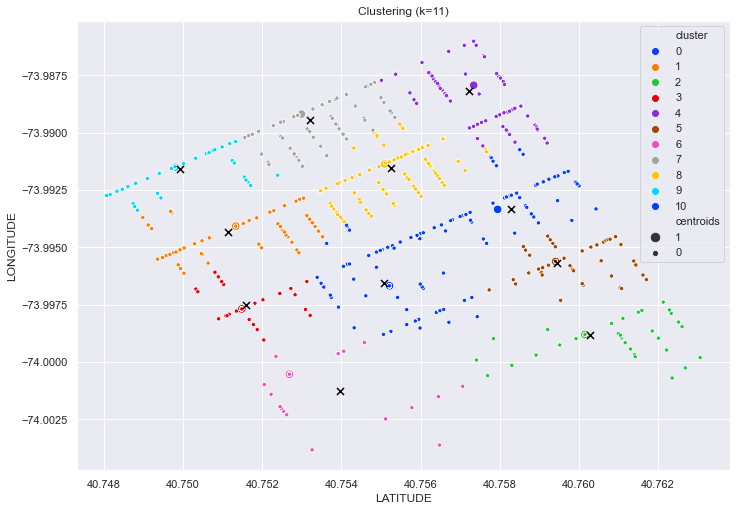

In [58]:
### ## plot
plt.figure(figsize = (10,12))
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots()

sns.scatterplot(x="LATITUDE", y="LONGITUDE", data=df, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")